## Desafio 1


Pesquise no repositório de classificadores pré-treinados de Haar, um classificador de sorriso e exiba em tela a área referente ao retângulo do sorriso detectado.
Por se tratar de um componente de face, avalie combinar mais que um classificador.

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
print(cv2.__version__)

#Pop-up do Matplotlib
#%matplotlib qt

#Exibição na mesma tela do Jupyter
%matplotlib inline

#plt.rcParams["figure.figsize"]\
#(8,5)

from io import BytesIO
from IPython.display import clear_output, Image, display
import PIL

import datetime

import dlib

plt.style.use('seaborn')
sns.set_style("whitegrid", {'axes.grid' : False})

/Users/michel.fernandes/anaconda/lib/python3.6/site-packages/joblib/_multiprocessing_helpers.py:28: UserWarning: [Errno 28] No space left on device.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


3.4.2


Text(0.5,1,'Exemplo')

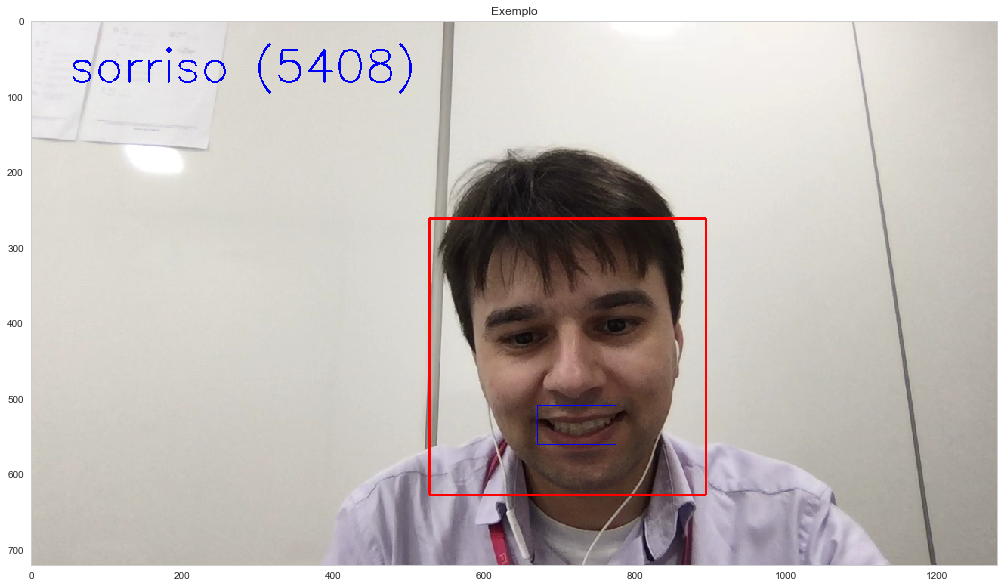

In [7]:
imagem = cv2.imread("imagens/camera_output_3.png")
plt.figure(figsize=(20,10))
plt.imshow(imagem)
plt.title("Exemplo")

In [5]:
def identificar_sorriso(imagem):
    face_classifier = cv2.CascadeClassifier('../classificadores/haarcascade_frontalface_default.xml')
    smile_classifier = cv2.CascadeClassifier('../classificadores/haarcascade_smile.xml')

    gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)

    if faces is ():
         cv2.putText(imagem, "rosto ausente", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255), 2)

    for (x,y,w,h) in faces:
        
        cv2.rectangle(imagem, (x, y), (x+w, y+h), (0, 0, 255), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = imagem[y:y+h, x:x+w]
        
        smile = smile_classifier.detectMultiScale(
            roi_gray,
            scaleFactor= 1.7,
            minNeighbors=22,
            minSize=(25, 25),
            flags=cv2.CASCADE_SCALE_IMAGE)

        # Set region of interest for smiles
        for (x, y, w, h) in smile:
            cv2.rectangle(roi_color, (x, y), (x+w, y+h), (255, 0, 0), 1)
            tamanho = int(w) * int(h)
            cv2.putText(imagem, "sorriso (%s)"%(tamanho), (50,80), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,0,0), 2)
            break

    return imagem

In [8]:
cam_capture = cv2.VideoCapture(0)

try:
    while True:
        ret, frame = cam_capture.read()

        if ret:
            frame = identificar_sorriso(frame)
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            img = PIL.Image.fromarray(frame, "RGB")
            buffer = BytesIO()
            img.save(buffer,format="JPEG")        
            display(Image(data=buffer.getvalue()))

            #cv2.imwrite("imagens/camera_output_1.png", frame)

            clear_output(wait=True)
except KeyboardInterrupt:
    cam_capture.release()
    print("Interrompido")

Interrompido
